In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file = 'Resources/public_transportation.csv'
raw_df = pd.read_csv(file)
next_raw_df = raw_df.sort_values(by=['Overall'])
next_raw_df

,Overall,City,Total Score,Accessibility,Safety,Resources
93,1,"Seattle, WA",77.97,7,6,3
98,2,"Boston, MA",77.84,2,34,10
99,3,"San Francisco, CA",75.21,1,27,80
97,4,"Washington, DC",71.23,3,48,52
54,5,"Madison, WI",71.06,46,1,4
...,...,...,...,...,...,...
72,96,"New Orleans, LA",42.43,28,92,100
47,97,"Charlotte, NC",40.67,53,95,88
33,98,"Tampa, FL",24.69,67,98,91
27,99,"St. Petersburg, FL",24.03,73,98,91


In [6]:
#Grab largest cities and their scores.

new = next_raw_df['City'].str.split(", ", n=1, expand = True)
next_raw_df['State'] = new[1]
next_raw_df['City'] = new[0]

transportation_df = next_raw_df[['City','State', 'Total Score']]

transportation_df


,City,State,Total Score
93,Seattle,WA,77.97
98,Boston,MA,77.84
99,San Francisco,CA,75.21
97,Washington,DC,71.23
54,Madison,WI,71.06
...,...,...,...
72,New Orleans,LA,42.43
47,Charlotte,NC,40.67
33,Tampa,FL,24.69
27,St. Petersburg,FL,24.03


In [7]:
transportation_final = transportation_df.groupby(['State']).agg({'Total Score':['mean']})

transportation_final



,Total Score
,mean
State,
AK,54.880000
AL,56.150000
AZ,51.781429
CA,59.483529
CO,59.413333
DC,71.230000
FL,44.015000
GA,56.470000


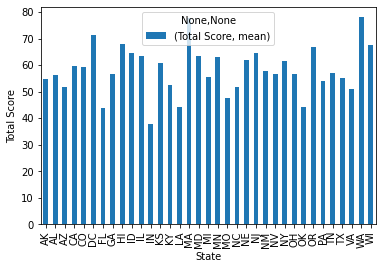

In [24]:
#transportation_graph.plot.bar()
transportation_chart = transportation_final.plot(kind='bar')

transportation_chart.set_xlabel("State")
transportation_chart.set_ylabel("Total Score")


plt.show()



In [ ]:
transportation_final.to_csv('public_transportation.csv')